# Projeto de estágio em dados Itaú

## Importando as bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans


## Análise Exploratória e higienização da base

In [2]:
# caminho do arquivo
file_path = 'dataset/Ecommerce_DBS.csv'
data = pd.read_csv(file_path)

# Exibir as primeiras tuplas
data = data.rename(columns={'Customer Age ': 'Customer Age'})
data.head()


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,NPS,Customer Age,Gender,Source,Country,State,Latitude,Longituide
0,46251,08/09/2020,Electronics,12,3,740,7,20,Male,Instagram Campign,Canada,Alberta,55.000000,-115.000000
1,46251,05/03/2022,Home,468,4,2739,8,20,Male,Instagram Campign,Canada,Ontario,50.000000,-85.000000
2,46251,23/05/2022,Home,288,2,3196,10,20,Male,SEM,United States,New Mexico,34.840515,-106.248482
3,46251,12/11/2020,Clothing,196,1,3509,3,20,Male,Instagram Campign,Canada,Saskatchewan,55.000000,-106.000000
4,13593,27/11/2020,Home,449,1,3452,3,20,Female,Instagram Campign,United States,California,36.116203,-119.681564


#### Classificação das variáveis


| Variável                 | Tipo                  |
|--------------------------|-----------------------|
| Customer ID              | Quantitativa Discreta |
| Purchase Date            | Qualitativa Nominal   |
| Product Category         | Qualitativa Nominal   |
| Product Price            | Quantitativa Contínua |
| Quantity                 | Quantitativa Discreta |
| Total Purchase Amount    | Quantitativa Contínua |
| NPS                      | Quantitativa Discreta |
| Customer Age             | Quantitativa Discreta |
| Gender                   | Qualitativa Nominal   |
| Source                   | Qualitativa Nominal   |
| Country                  | Qualitativa Nominal   |
| State                    | Qualitativa Nominal   |
| Latitude                 | Quantitativa Contínua |
| Longituide               | Quantitativa Contínua |

In [3]:
#Inspeção Inicial dos Dados
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   NPS                    250000 non-null  int64  
 7   Customer Age           250000 non-null  int64  
 8   Gender                 250000 non-null  object 
 9   Source                 250000 non-null  object 
 10  Country                250000 non-null  object 
 11  State                  250000 non-null  object 
 12  Latitude               250000 non-null  float64
 13  Longituide             250000 non-null  float64
dtypes: float64(2), int64(6), object(6)
m

In [4]:
#convertendo os dados
data['Customer ID'] = data['Customer ID'].astype('int64')      
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'], format='%d/%m/%Y')
data['Product Category'] = data['Product Category'].astype('string')
data['Product Price'] = data['Product Price'].astype('float64')
data['Quantity'] = data['Quantity'].astype('int64')
data['Total Purchase Amount'] = data['Total Purchase Amount'].astype('float64')
data['NPS'] = data['NPS'].astype('int64')
data['Customer Age'] = data['Customer Age'].astype('int64')
data['Gender'] = data['Gender'].astype('string')
data['Source'] = data['Source'].astype('string')
data['Country'] = data['Country'].astype('string')
data['State'] = data['State'].astype('string')
data['Latitude'] = data['Latitude'].astype('float64')
data['Longituide'] = data['Longituide'].astype('float64')

# Verificando a conversão dos dados
data.dtypes


Customer ID                       int64
Purchase Date            datetime64[ns]
Product Category         string[python]
Product Price                   float64
Quantity                          int64
Total Purchase Amount           float64
NPS                               int64
Customer Age                      int64
Gender                   string[python]
Source                   string[python]
Country                  string[python]
State                    string[python]
Latitude                        float64
Longituide                      float64
dtype: object

In [5]:
#estatística descritiva
print(data.describe())

        Customer ID                  Purchase Date  Product Price  \
count  250000.00000                         250000  250000.000000   
mean    25004.03624  2021-11-06 11:32:12.825599744     254.659512   
min         1.00000            2020-01-01 00:00:00      10.000000   
25%     12497.75000            2020-12-02 00:00:00     132.000000   
50%     25018.00000            2021-11-06 00:00:00     255.000000   
75%     37506.00000            2022-10-11 00:00:00     377.000000   
max     50000.00000            2023-09-15 00:00:00     500.000000   
std     14428.27959                            NaN     141.568577   

            Quantity  Total Purchase Amount            NPS   Customer Age  \
count  250000.000000          250000.000000  250000.000000  250000.000000   
mean        2.998896            2725.370732       4.991832      43.759228   
min         1.000000             100.000000       0.000000      18.000000   
25%         2.000000            1477.000000       2.000000      30.000

In [6]:
# Selecionar apenas as colunas relevantes
relevant_columns = ['Purchase Date','Product Category', 'Product Price', 'Quantity','NPS', 'Customer Age', 'Gender','Source']
data_relevant = data[relevant_columns]

# Exibir as primeiras linhas do DataFrame com as colunas relevantes
data_relevant.head()


,Purchase Date,Product Category,Product Price,Quantity,NPS,Customer Age,Gender,Source
0,2020-09-08,Electronics,12.0,3,7,20,Male,Instagram Campign
1,2022-03-05,Home,468.0,4,8,20,Male,Instagram Campign
2,2022-05-23,Home,288.0,2,10,20,Male,SEM
3,2020-11-12,Clothing,196.0,1,3,20,Male,Instagram Campign
4,2020-11-27,Home,449.0,1,3,20,Female,Instagram Campign


In [7]:
data_relevant.describe()

,Purchase Date,Product Price,Quantity,NPS,Customer Age
count,250000,250000.000000,250000.000000,250000.000000,250000.000000
mean,2021-11-06 11:32:12.825599744,254.659512,2.998896,4.991832,43.759228
min,2020-01-01 00:00:00,10.000000,1.000000,0.000000,18.000000
25%,2020-12-02 00:00:00,132.000000,2.000000,2.000000,30.000000
50%,2021-11-06 00:00:00,255.000000,3.000000,5.000000,44.000000
75%,2022-10-11 00:00:00,377.000000,4.000000,8.000000,57.000000
max,2023-09-15 00:00:00,500.000000,5.000000,10.000000,70.000000
std,NaN,141.568577,1.414694,3.166732,15.392075


In [8]:
# Checar valores ausentes e verificar se há necessidade de fazer uma limpeza no dataframe
missing_values = data_relevant.isnull().sum()
print("Valores ausentes antes da limpeza:")
print(missing_values)

# Verificar se há valores ausentes
if missing_values.sum() > 0:
    # Realizar a limpeza removendo linhas com valores ausentes
    data_cleaned = data_relevant.dropna()

    # Checar novamente os valores ausentes após a limpeza
    missing_values_cleaned = data_cleaned.isnull().sum()
    print("\nValores ausentes após a limpeza:")
    print(missing_values_cleaned)

    # Exibir as primeiras linhas do DataFrame limpo
    print("\nDataFrame limpo:")
    print(data_relevant.head())
else:
    data_cleaned = data_relevant
    print("Não há valores ausentes. Não é necessário realizar a limpeza.")


Valores ausentes antes da limpeza:
Purchase Date       0
Product Category    0
Product Price       0
Quantity            0
NPS                 0
Customer Age        0
Gender              0
Source              0
dtype: int64
Não há valores ausentes. Não é necessário realizar a limpeza.


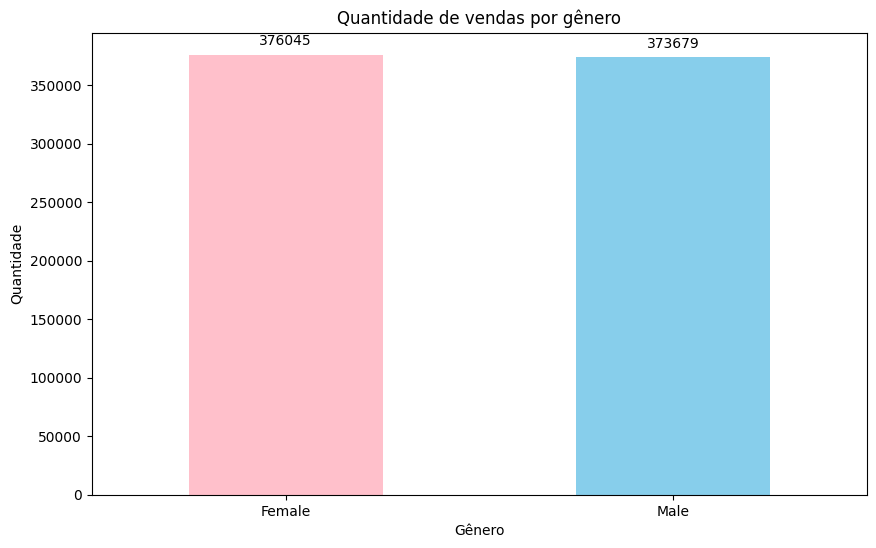

In [9]:
# Gráfico de quantidade por Gêneroo
gender_quantity = data_cleaned.groupby('Gender')['Quantity'].sum()

# Configurando cores específicas
colors = ['skyblue' if gender == 'Male' else 'pink' for gender in gender_quantity.index]

# Criando o gráfico de barras
plt.figure(figsize=(10,6))
ax = gender_quantity.plot(kind='bar', color=colors)
plt.title('Quantidade de vendas por gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)

# Adicionando rótulos de quantidade
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

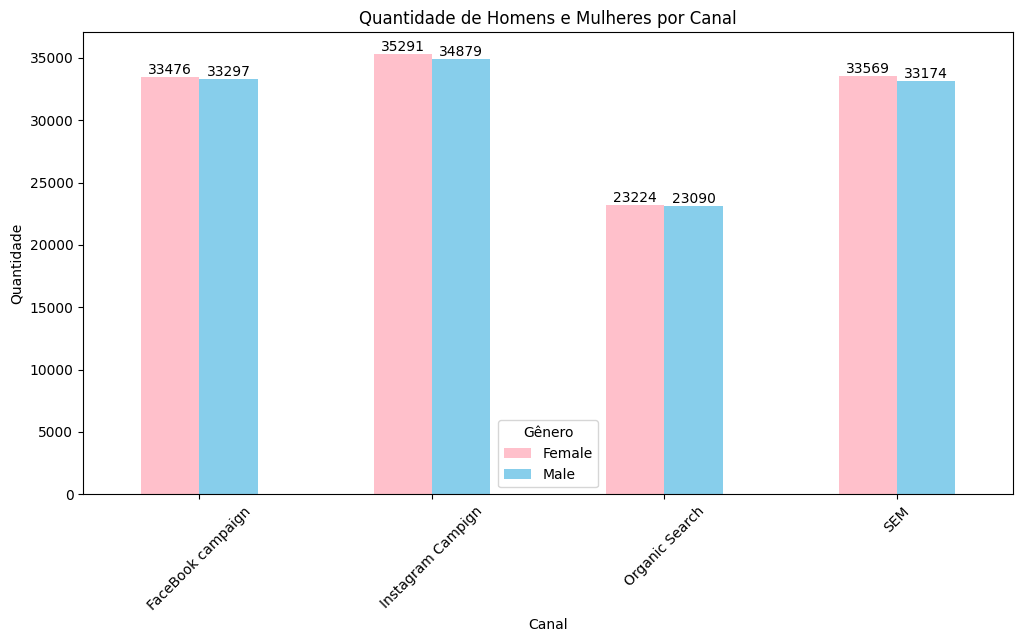

In [10]:
# Criar um gráfico de barras para mostrar a quantidade de homens e mulheres por cada canal
gender_source_counts = data.groupby(['Source', 'Gender']).size().unstack(fill_value=0)

# Configurando cores específicas
colors = {'Male': 'skyblue', 'Female': 'pink'}

# Plotando o gráfico de barras
ax = gender_source_counts.plot(kind='bar', figsize=(12, 6), color=[colors[col] for col in gender_source_counts.columns])
plt.title('Quantidade de Homens e Mulheres por Canal')
plt.xlabel('Canal')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.legend(title='Gênero')

# Adicionando os valores em cima de cada barra
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()


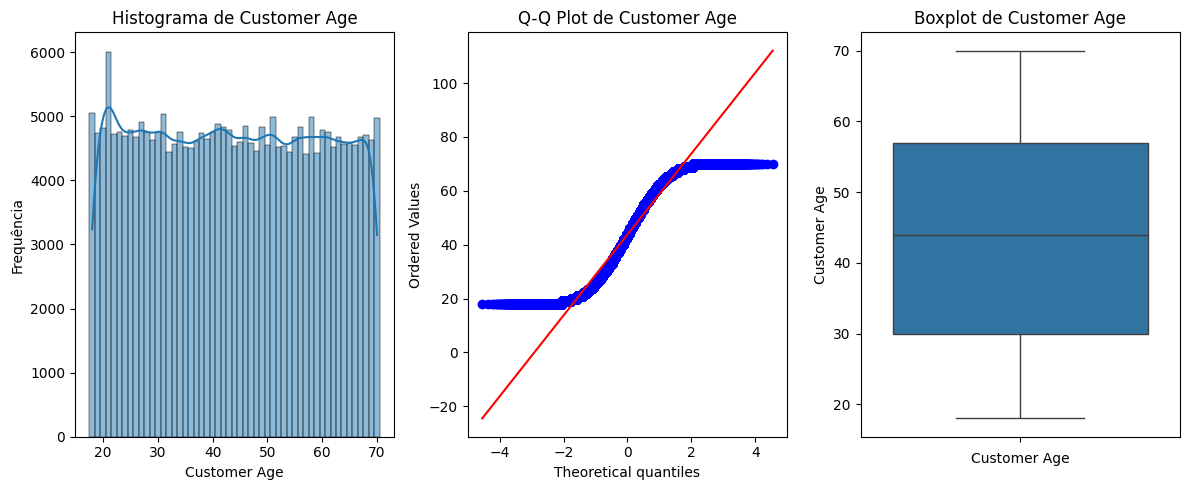

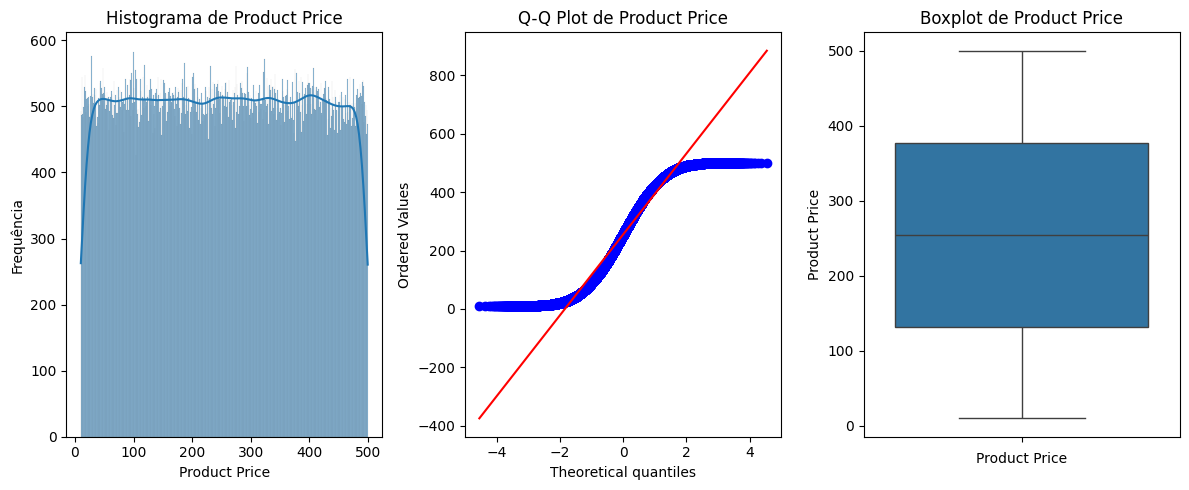

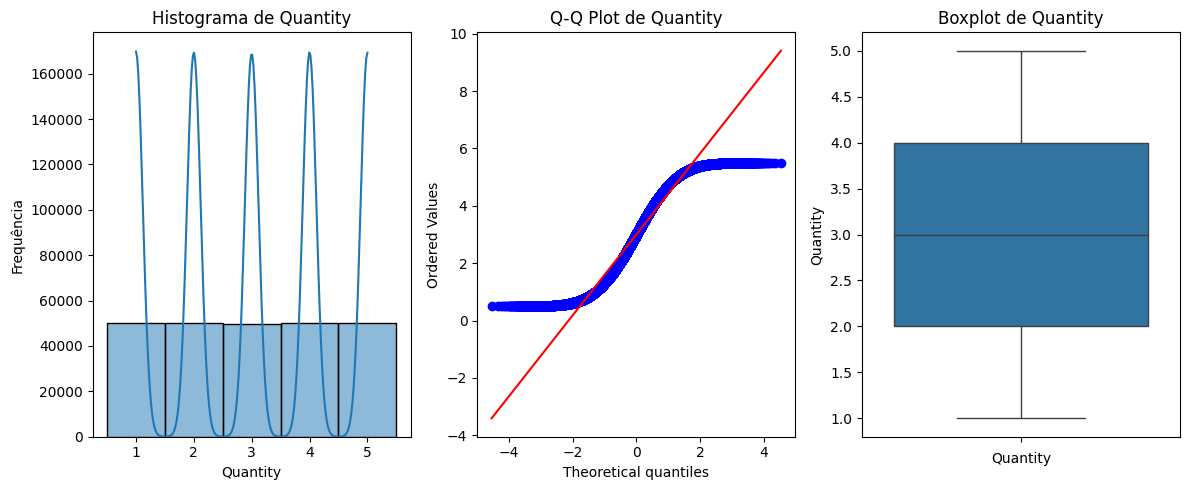

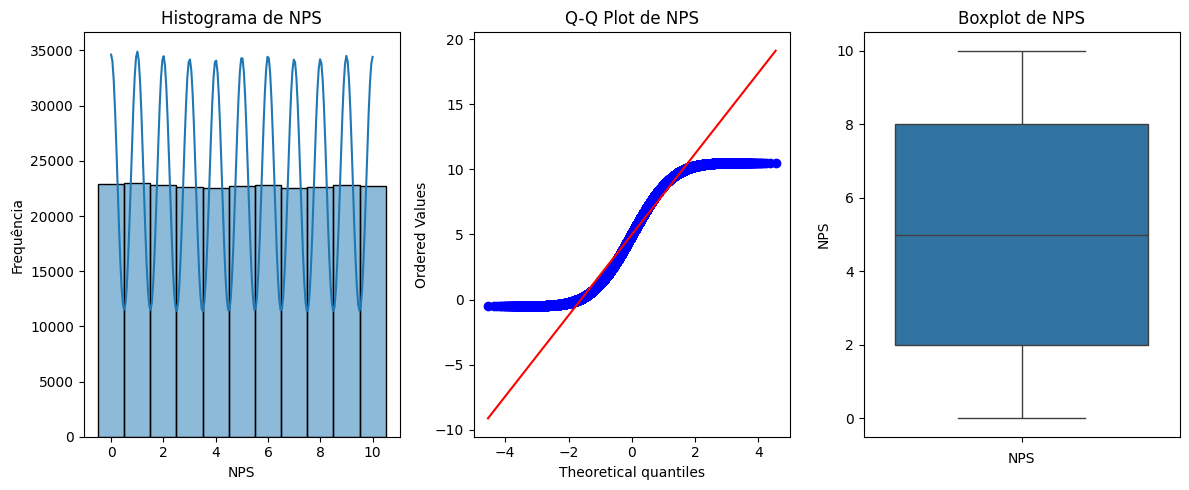

In [11]:
# Selecionando as variáveis numéricas
numeric_cols = ['Customer Age', 'Product Price', 'Quantity', 'NPS']

# Criar histogramas, Q-Q plots e boxplots para cada variável numérica
for col in numeric_cols:
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 3, 1)
    # Ajustar o histograma para não ter espaços entre as barras
    sns.histplot(data_cleaned[col], kde=True, bins=len(data_cleaned[col].unique()), discrete=True)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')

    plt.subplot(1, 3, 3)
    sns.boxplot(y=data_cleaned[col])
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)

    plt.subplot(1, 3, 2)
    if col == 'NPS' or data_cleaned[col].nunique() <= 5:
        # Se a variável for NPS ou discreta com poucos valores únicos, usar jitter para o Q-Q plot
        jittered_data = data_cleaned[col] + np.random.uniform(-0.5, 0.5, size=len(data_cleaned[col]))
        stats.probplot(jittered_data, dist="norm", plot=plt)
    else:
        stats.probplot(data_cleaned[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot de {col}')
    
    plt.tight_layout()
    plt.show()

# Questões
## 1) Quais os produtos mais vendidos considerando os últimos 3 anos?

In [12]:
# Converte a coluna 'Purchase Date' para o formato datetime
data_cleaned.loc[:, 'Purchase Date'] = pd.to_datetime(data_cleaned['Purchase Date'], format='%d/%m/%Y')

# filtra os ultimos 3 anos a partir da data mais recente de compra
end_date = data_cleaned['Purchase Date'].max()
start_date = end_date - pd.DateOffset(years=3)
filtered_data = data_cleaned[(data_cleaned['Purchase Date'] >= start_date) & (data_cleaned['Purchase Date'] <= end_date)]

# calcula a quantidade de vendas por categoria de produtos
product_sales = filtered_data.groupby('Product Category')['Quantity'].sum().reset_index()

# ordena a tabela por quantidade de vendas
top_products = product_sales.sort_values(by='Quantity', ascending=False)
top_products.reset_index(drop=True, inplace=True)

# Display the table with top products
print(top_products)


  Product Category  Quantity
0         Clothing    182696
1            Books    181069
2      Electronics    121867
3             Home    120696


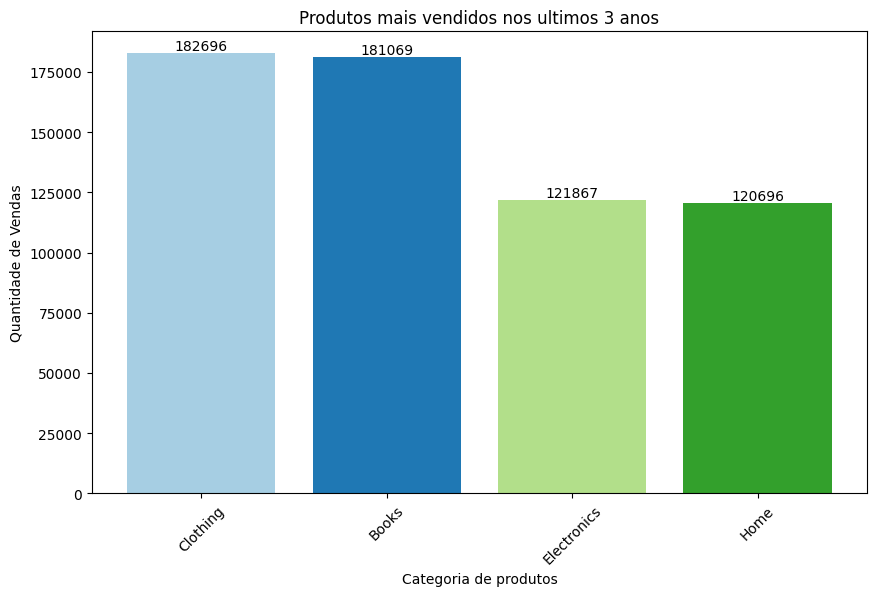

In [13]:

colors = plt.cm.Paired(range(len(top_products)))

# Gráfico de barras para investigar a categoria de produto mais vendido
plt.figure(figsize=(10, 6))
bars = plt.bar(top_products['Product Category'], top_products['Quantity'], color=colors)

# Identificar o valor no topo da barra
for bar, val in zip(bars, top_products['Quantity']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, val, ha='center', va='bottom'
    )

plt.xlabel('Categoria de produtos')
plt.ylabel('Quantidade de Vendas')
plt.title('Produtos mais vendidos nos ultimos 3 anos')
plt.xticks(rotation=45)
plt.show()

## 2) Qual o produto mais caro e o mais barato?

In [14]:
# Encontrar todos os produtos com o preço mais alto
most_expensive_products = data_cleaned[data_cleaned['Product Price'] == data_cleaned['Product Price'].max()]
# Encontrar todos os produtos com o preço mais baixo
cheapest_products = data_cleaned[data_cleaned['Product Price'] == data_cleaned['Product Price'].min()]

In [15]:
# Encontrar todos os produtos com o preço mais alto
most_expensive_products = data_cleaned[data_cleaned['Product Price'] == data_cleaned['Product Price'].max()]
# Encontrar todos os produtos com o preço mais baixo
cheapest_products = data_cleaned[data_cleaned['Product Price'] == data_cleaned['Product Price'].min()]

# Contar a quantidade de observações com o mesmo preço para os produtos mais caros e mais baratos
count_most_expensive = most_expensive_products.shape[0]  # Contagem de linhas
count_cheapest = cheapest_products.shape[0]  # Contagem de linhas

# Selecionar apenas as categorias distintas dos produtos mais caros e colocá-las em um array
product_category_most_expensive = most_expensive_products['Product Category'].unique()
product_category_cheapest = cheapest_products['Product Category'].unique()

# Criar DataFrames para os produtos mais caros e mais baratos
df_most_expensive = pd.DataFrame({
    'Preço do Produto': [most_expensive_products['Product Price'].iloc[0]],
    'Quantidade de Observações': [count_most_expensive],
    'Categorias': [', '.join(product_category_most_expensive)]
})

df_cheapest = pd.DataFrame({
    'Preço do Produto': [cheapest_products['Product Price'].iloc[0]],
    'Quantidade de Observações': [count_cheapest],
    'Categorias': [', '.join(product_category_cheapest)]
})


# Concatenar os DataFrames em uma única tabela
df = pd.concat([df_most_expensive, df_cheapest], keys=['Maior Valor', 'Menor Valor']).reset_index(level=0).rename(columns={'level_0': '-'})

# Resetar o índice para aparecer a esquerda de cada observação
df.reset_index(drop=True, inplace=True)

# Exibir a tabela
df


,-,Preço do Produto,Quantidade de Observações,Categorias
0,Maior Valor,500.0,474,"Electronics, Home, Books, Clothing"
1,Menor Valor,10.0,493,"Electronics, Clothing, Books, Home"


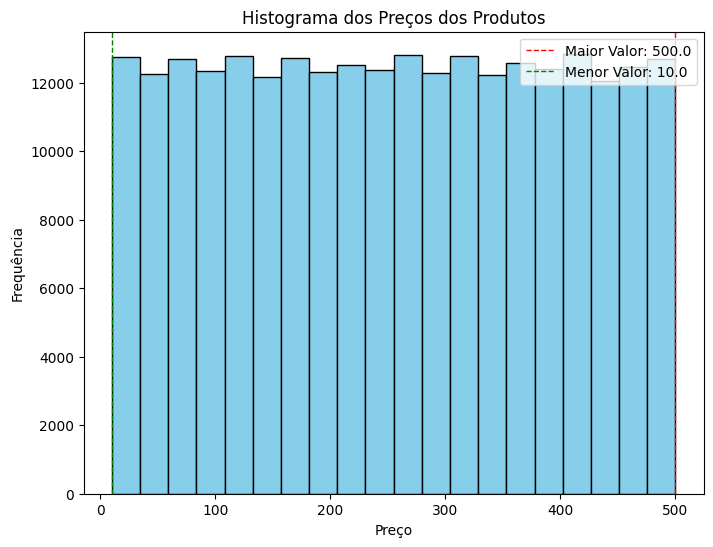

In [16]:

# Criar o histograma
plt.figure(figsize=(8, 6))
plt.hist(data_cleaned['Product Price'], bins=20, color='skyblue', edgecolor='black')

# Adicionar linhas verticais para os valores mais alto e mais baixo
max_price = data_cleaned['Product Price'].max()
min_price = data_cleaned['Product Price'].min()
plt.axvline(x=max_price, color='red', linestyle='--', linewidth=1, label=f'Maior Valor: {max_price}')
plt.axvline(x=min_price, color='green', linestyle='--', linewidth=1, label=f'Menor Valor: {min_price}')

# Definir título e rótulos dos eixos
plt.title('Histograma dos Preços dos Produtos')
plt.xlabel('Preço')
plt.ylabel('Frequência')

# Adicionar legenda
plt.legend()

# Exibir o histograma
plt.show()


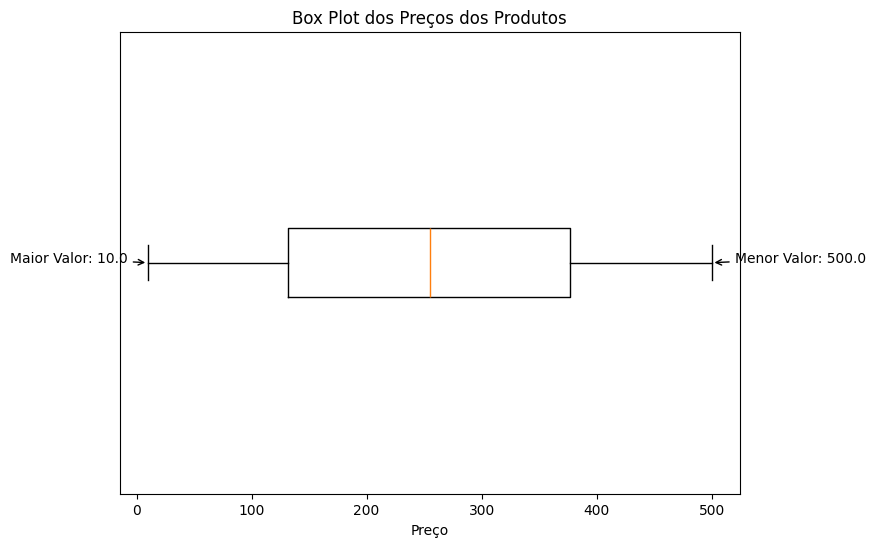

In [17]:

plt.figure(figsize=(8, 6))
plt.boxplot(data_cleaned['Product Price'], vert=False)

# Adicionar anotações para os valores mais alto e mais baixo
max_price = data_cleaned['Product Price'].max()
min_price = data_cleaned['Product Price'].min()
plt.annotate(f'Menor Valor: {max_price}', xy=(max_price, 1), xytext=(max_price + 20, 1), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Maior Valor: {min_price}', xy=(min_price, 1), xytext=(min_price - 120, 1), arrowprops=dict(facecolor='black', arrowstyle='->'))

# Definir título e rótulos dos eixos
plt.title('Box Plot dos Preços dos Produtos')
plt.xlabel('Preço')
plt.yticks([])  # Desativar os rótulos do eixo y

# Exibir o box plot
plt.show()

## 3) Qual a categoria de produto mais vendida e menor vendida? Qual a categoria mais e menos cara?

In [18]:
# Calculate total quantity sold for each category
category_sales = data_cleaned.groupby('Product Category')['Quantity'].sum().reset_index()
category_sales.columns = ['Categoria de Produtos', 'Total Vendido']
category_sales.sort_values(by='Total Vendido', ascending = False, inplace = True)
category_sales.reset_index(drop = True, inplace = True)
category_sales


,Categoria de Produtos,Total Vendido
0,Clothing,225322
1,Books,223876
2,Electronics,150828
3,Home,149698


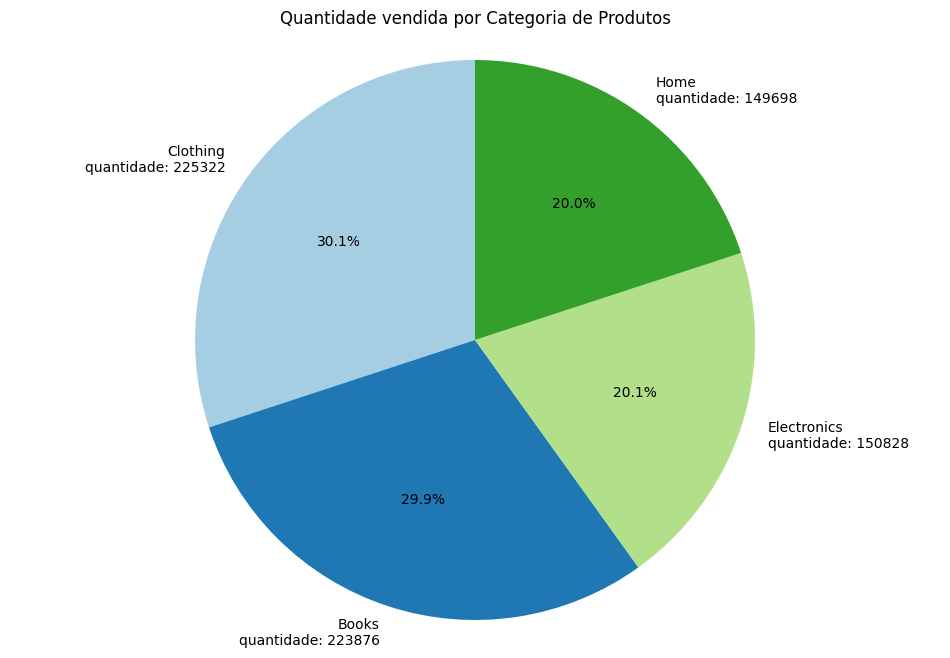

In [19]:


#plotando o gráfico de pizza
plt.figure(figsize=(12, 8))
colors = plt.cm.Paired.colors
plt.pie(
    category_sales['Total Vendido'],
    labels=[
        f"{row['Categoria de Produtos']}\nquantidade: {row['Total Vendido']}"
        for _, row in category_sales.iterrows()
    ],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title('Quantidade vendida por Categoria de Produtos')
plt.axis('equal') 
plt.show()


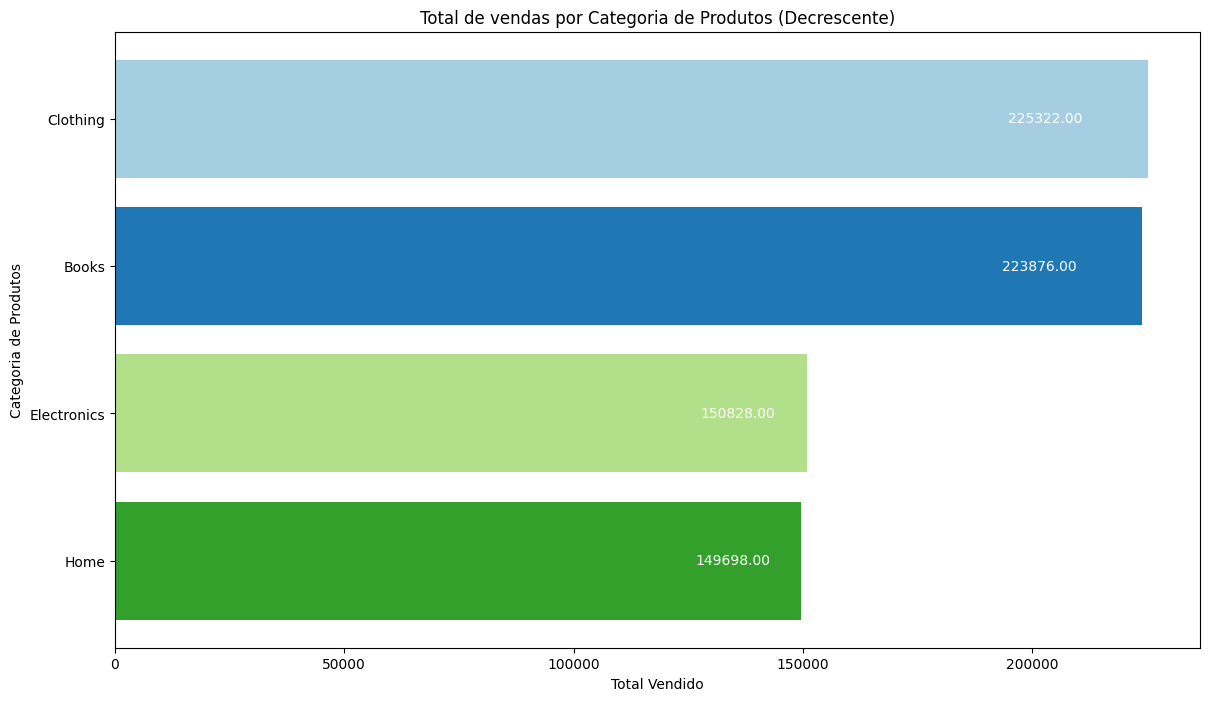

In [20]:
# Plot the bar chart with different colors for each category
plt.figure(figsize=(14, 8))
bars = plt.barh(
    category_sales['Categoria de Produtos'],
    category_sales['Total Vendido'],
    color=plt.cm.Paired(range(len(category_sales)))
)
plt.xlabel('Total Vendido')
plt.ylabel('Categoria de Produtos')
plt.title('Total de vendas por Categoria de Produtos (Decrescente)')

# Annotate the bars with the values
for bar, value in zip(bars, category_sales['Total Vendido']):
    plt.text(bar.get_width() - (bar.get_width() * 0.1), bar.get_y() + bar.get_height()/2, f"{value:.2f}", va='center', ha='center', color='white')

plt.gca().invert_yaxis()
plt.show()

In [21]:

category_prices = data_cleaned.groupby('Product Category')['Product Price'].mean().reset_index()
category_prices.columns = ['Categoria de Produtos', 'Media de preco']
category_prices.sort_values(by='Media de preco', ascending=False,inplace = True)

category_prices['Media de preco'] = category_prices['Media de preco'].round(2)
category_prices.reset_index(drop=True, inplace=True)
category_prices

,Categoria de Produtos,Media de preco
0,Home,254.84
1,Electronics,254.72
2,Books,254.71
3,Clothing,254.45


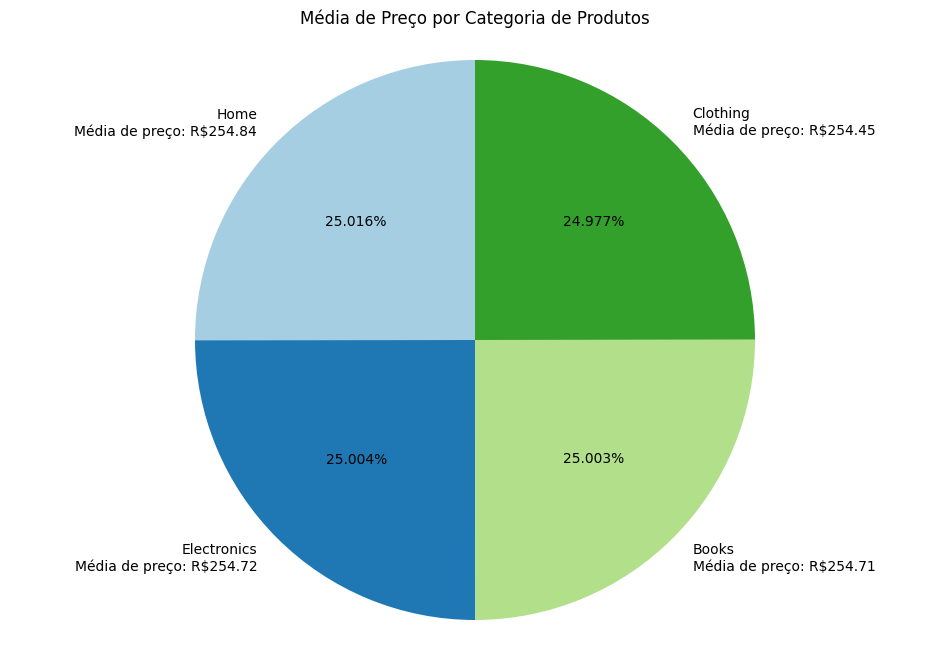

In [22]:


# Plot the pie chart
plt.figure(figsize=(12, 8))
colors = plt.cm.Paired.colors
plt.pie(
    category_prices['Media de preco'],
    labels=[
        f"{row['Categoria de Produtos']}\nMédia de preço: R${row['Media de preco']}"
        for _, row in category_prices.iterrows()
    ],
    autopct='%1.3f%%',
    startangle=90,
    colors=colors
)
plt.title('Média de Preço por Categoria de Produtos')
plt.axis('equal')  
plt.show()


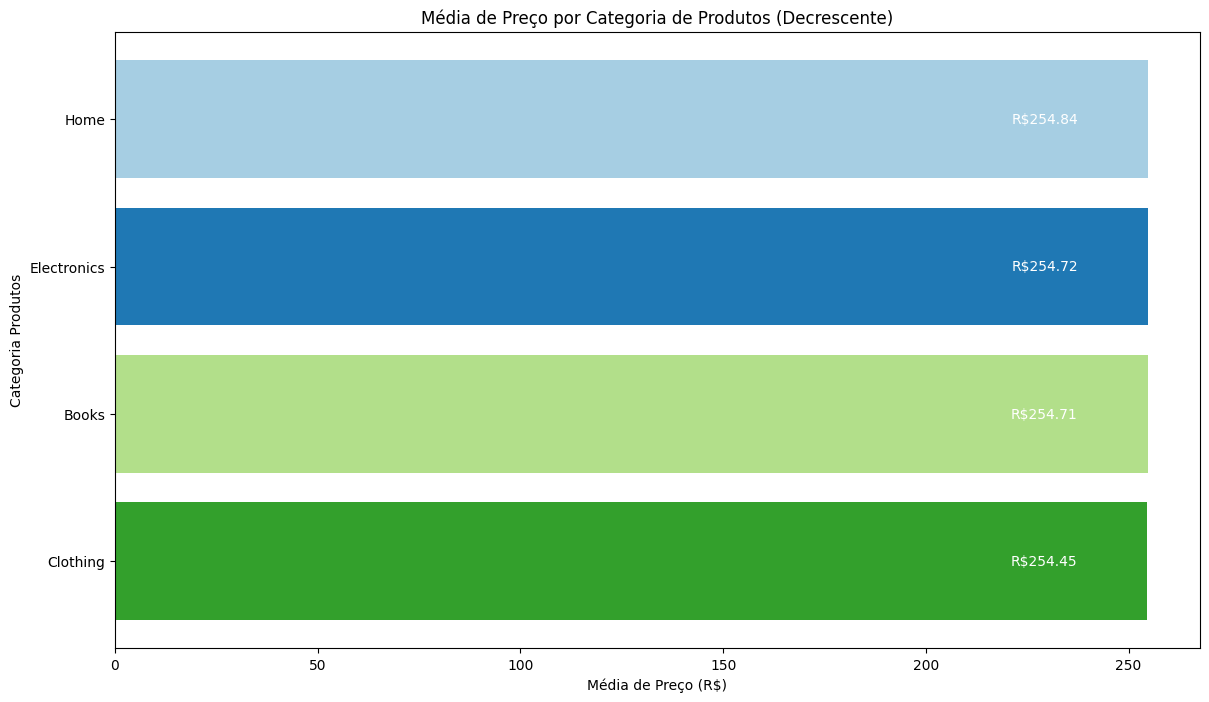

In [23]:
# Plot the bar chart with different colors for each category
plt.figure(figsize=(14, 8))
bars = plt.barh(
    category_prices['Categoria de Produtos'],
    category_prices['Media de preco'],
    color=plt.cm.Paired(range(len(category_prices)))
)
plt.xlabel('Média de Preço (R$)')
plt.ylabel('Categoria Produtos')
plt.title('Média de Preço por Categoria de Produtos (Decrescente)')

# Annotate the bars with the values
for bar, value in zip(bars, category_prices['Media de preco']):
    plt.text(bar.get_width() - (bar.get_width() * 0.1), bar.get_y() + bar.get_height()/2, f"R${value:.2f}", va='center', ha='center', color='white')

plt.gca().invert_yaxis()
plt.show()

## 4) Qual o produto com melhor e pior NPS?

In [24]:
#criar dataframe com a média NPS por categoria de produto

category_NPS =  data_cleaned.groupby('Product Category')['NPS'].mean().reset_index()
category_NPS.columns = ['Categoria de Produtos', 'NPS Medio']
category_NPS.sort_values('NPS Medio',ascending = False, inplace = True)
category_NPS.reset_index(drop = True, inplace = True)
category_NPS

,Categoria de Produtos,NPS Medio
0,Home,5.011394
1,Books,5.003698
2,Clothing,4.983904
3,Electronics,4.966544


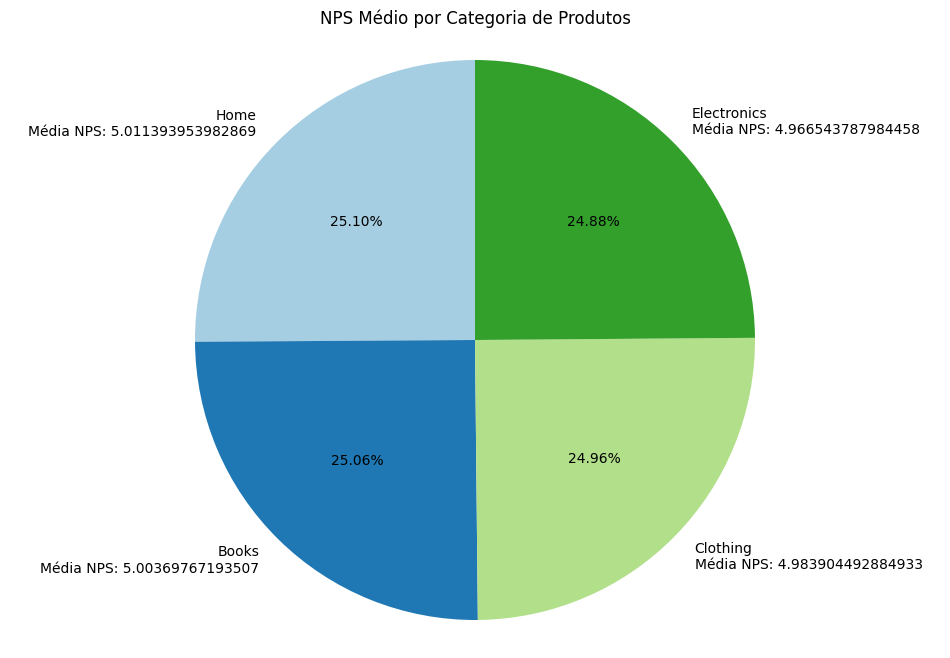

In [25]:
# Plotar o Gráfico de pizza para a o NPS MÉDIO para cada Categoria de Produtos
plt.figure(figsize=(12, 8))
colors = plt.cm.Paired.colors
plt.pie(
    category_NPS['NPS Medio'],
    labels=[
        f"{row['Categoria de Produtos']}\nMédia NPS: {row['NPS Medio']}"
        for _, row in category_NPS.iterrows()
    ],
    autopct='%1.2f%%',
    startangle=90,
    colors=colors
)
plt.title('NPS Médio por Categoria de Produtos')
plt.axis('equal')  
plt.show()


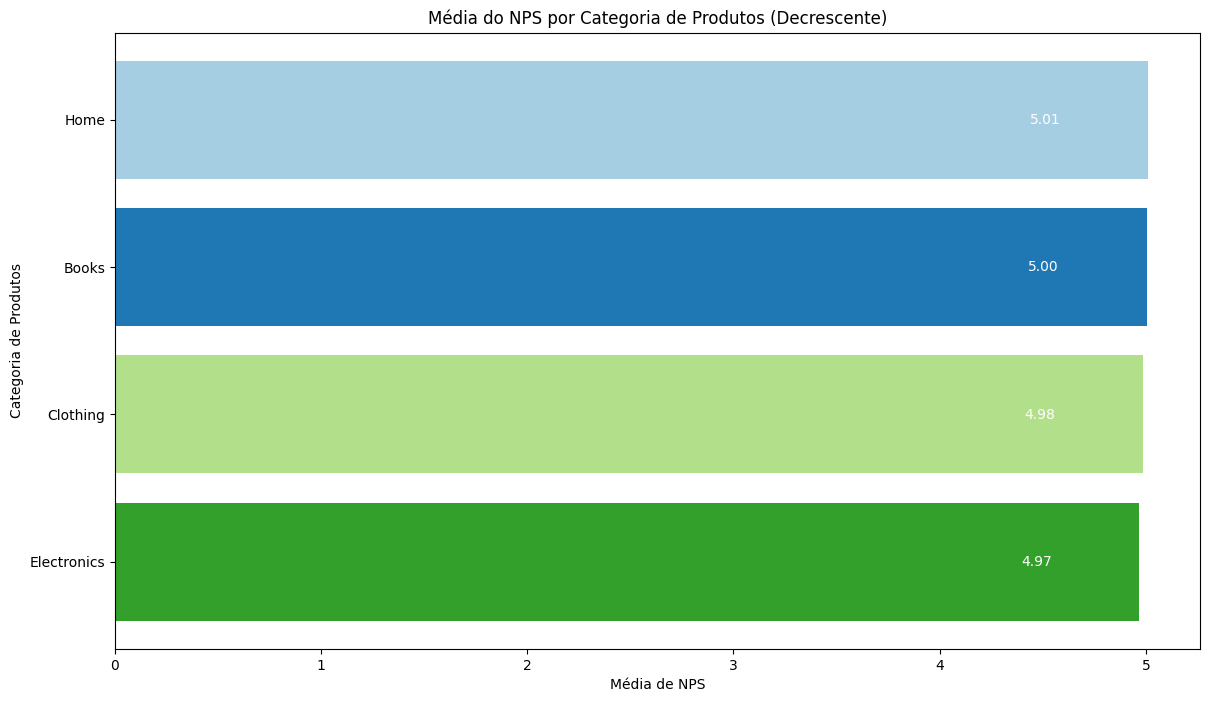

In [26]:
# Plot the bar chart with different colors for each category
plt.figure(figsize=(14, 8))
bars = plt.barh(
    category_NPS['Categoria de Produtos'],
    category_NPS['NPS Medio'],
    color=plt.cm.Paired(range(len(category_NPS)))
)
plt.xlabel('Média de NPS')
plt.ylabel('Categoria de Produtos')
plt.title('Média do NPS por Categoria de Produtos (Decrescente)')

# Annotate the bars with the values
for bar, value in zip(bars, category_NPS['NPS Medio']):
    plt.text(bar.get_width() - (bar.get_width() * 0.1), bar.get_y() + bar.get_height()/2, f"{value:.2f}", va='center', ha='center', color='white')

plt.gca().invert_yaxis()
plt.show()

## Desafio: Analisando a base de dados, qual o tipo de público(considerando gênero e idade) e o canal ideal para vender determinado tipo de produto? 

#### Ideia principal:
- Identificar grupos de clientes distintos
- Verificar dentro de cada grupo quais as características e preferências de produtos
#### Como fazer:
- Análise de clusters

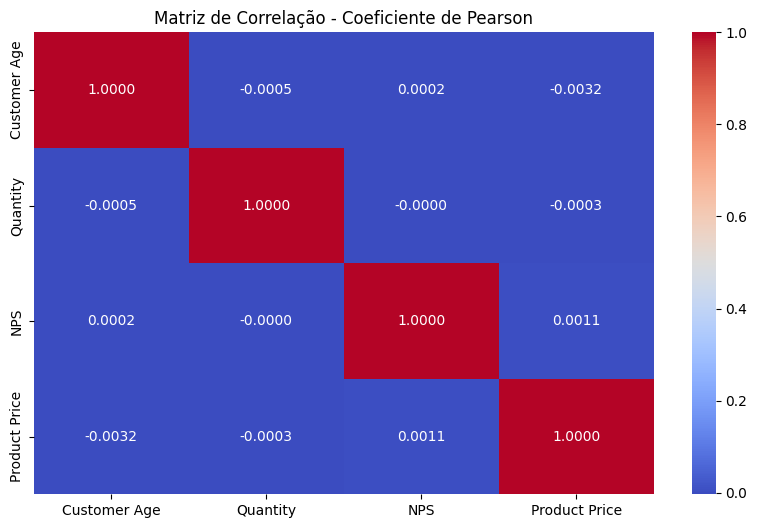

In [27]:
# Selecionar as variáveis numéricas
numeric_cols = ['Customer Age', 'Quantity', 'NPS', 'Product Price']

# Análise de Correlação - Pearson para variáveis contínuas
corr_matrix = data_cleaned[numeric_cols].corr(method='pearson')

# Visualização da matriz de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.4f')
plt.title('Matriz de Correlação - Coeficiente de Pearson')
plt.show()

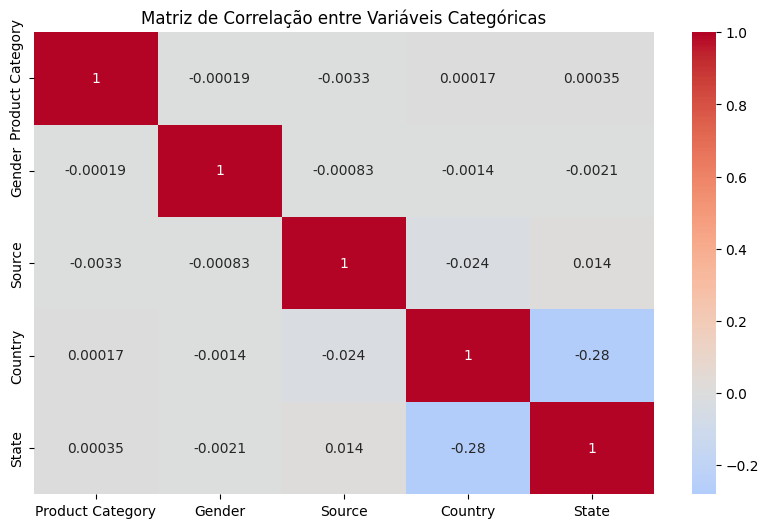

In [28]:
# Convertendo variáveis categóricas em variáveis numéricas
categorical_columns = ['Product Category', 'Gender', 'Source', 'Country', 'State']
data_encoded = data.copy()

for column in categorical_columns:
    data_encoded[column] = data_encoded[column].astype('category').cat.codes

# Calculando a matriz de correlação
corr_matrix = data_encoded[categorical_columns].corr(method='pearson')

# Plotando a matriz de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação entre Variáveis Categóricas')
plt.show()

In [29]:
# Criando as variáveis dummy para as variáveis categóricas
data_cleaned_dummy = pd.get_dummies(data_cleaned, columns=['Gender', 'Source'])

In [30]:
data_cleaned_dummy

,Purchase Date,Product Category,Product Price,Quantity,NPS,Customer Age,Gender_Female,Gender_Male,Source_FaceBook campaign,Source_Instagram Campign,Source_Organic Search,Source_SEM
0,2020-09-08,Electronics,12.0,3,7,20,False,True,False,True,False,False
1,2022-03-05,Home,468.0,4,8,20,False,True,False,True,False,False
2,2022-05-23,Home,288.0,2,10,20,False,True,False,False,False,True
3,2020-11-12,Clothing,196.0,1,3,20,False,True,False,True,False,False
4,2020-11-27,Home,449.0,1,3,20,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
249995,2023-08-10,Clothing,279.0,2,1,55,False,True,False,False,False,True
249996,2021-11-23,Home,27.0,1,1,42,True,False,False,True,False,False
249997,2020-07-02,Home,17.0,5,0,41,False,True,False,True,False,False
249998,2020-12-30,Books,398.0,2,8,34,True,False,False,True,False,False


In [31]:
#Realizando o processo de normalização da variável numérica idade
scaler = MinMaxScaler()
data_cleaned_dummy['Customer Agenormalized'] = scaler.fit_transform(data_cleaned_dummy[['Customer Age']])

data_cleaned_dummy

,Purchase Date,Product Category,Product Price,Quantity,NPS,Customer Age,Gender_Female,Gender_Male,Source_FaceBook campaign,Source_Instagram Campign,Source_Organic Search,Source_SEM,Customer Agenormalized
0,2020-09-08,Electronics,12.0,3,7,20,False,True,False,True,False,False,0.038462
1,2022-03-05,Home,468.0,4,8,20,False,True,False,True,False,False,0.038462
2,2022-05-23,Home,288.0,2,10,20,False,True,False,False,False,True,0.038462
3,2020-11-12,Clothing,196.0,1,3,20,False,True,False,True,False,False,0.038462
4,2020-11-27,Home,449.0,1,3,20,True,False,False,True,False,False,0.038462
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,2023-08-10,Clothing,279.0,2,1,55,False,True,False,False,False,True,0.711538
249996,2021-11-23,Home,27.0,1,1,42,True,False,False,True,False,False,0.461538
249997,2020-07-02,Home,17.0,5,0,41,False,True,False,True,False,False,0.442308
249998,2020-12-30,Books,398.0,2,8,34,True,False,False,True,False,False,0.307692


In [32]:
#selecionando as variáveis para o clustering
variables_for_clustering = data_cleaned_dummy.drop(columns=[ 'Purchase Date','Customer Age' , 'Product Category', 'Product Price', 'Quantity', 'NPS'])
variables_for_clustering

,Gender_Female,Gender_Male,Source_FaceBook campaign,Source_Instagram Campign,Source_Organic Search,Source_SEM,Customer Agenormalized
0,False,True,False,True,False,False,0.038462
1,False,True,False,True,False,False,0.038462
2,False,True,False,False,False,True,0.038462
3,False,True,False,True,False,False,0.038462
4,True,False,False,True,False,False,0.038462
...,...,...,...,...,...,...,...
249995,False,True,False,False,False,True,0.711538
249996,True,False,False,True,False,False,0.461538
249997,False,True,False,True,False,False,0.442308
249998,True,False,False,True,False,False,0.307692


In [33]:
# Método do cotovelo para encontrar o número ideal de clusters
wcss = [] 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(variables_for_clustering)
    wcss.append(kmeans.inertia_)

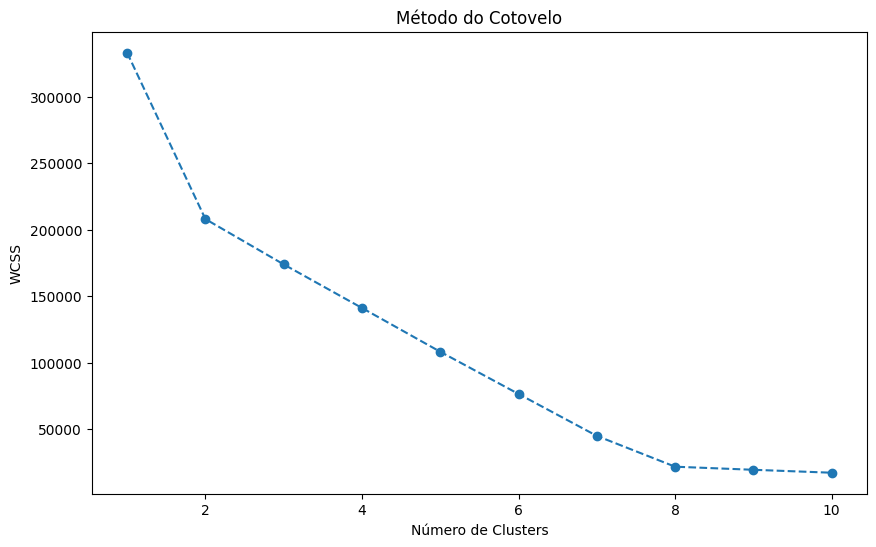

In [34]:
# Plotando o gráfico do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
# Aplicar K-Means com o número ideal de clusters
optimal_clusters = 5  # Escolha o valor ideal baseado no gráfico do cotovelo
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
data_cleaned_dummy['Cluster'] = kmeans.fit_predict(variables_for_clustering)

# Exibir as primeiras linhas do DataFrame com os clusters
print(data_cleaned_dummy.head())


  Purchase Date Product Category  Product Price  Quantity  NPS  Customer Age  \
0    2020-09-08      Electronics           12.0         3    7            20   
1    2022-03-05             Home          468.0         4    8            20   
2    2022-05-23             Home          288.0         2   10            20   
3    2020-11-12         Clothing          196.0         1    3            20   
4    2020-11-27             Home          449.0         1    3            20   

   Gender_Female  Gender_Male  Source_FaceBook campaign  \
0          False         True                     False   
1          False         True                     False   
2          False         True                     False   
3          False         True                     False   
4           True        False                     False   

   Source_Instagram Campign  Source_Organic Search  Source_SEM  \
0                      True                  False       False   
1                      True     

In [36]:
# Adicionando os clusters ao DataFrame original para análise
data_cleaned.loc[:, 'Cluster'] = data_cleaned_dummy['Cluster']
data_cleaned


C:\Users\andreas\AppData\Local\Temp\ipykernel_8876\532611840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.loc[:, 'Cluster'] = data_cleaned_dummy['Cluster']


,Purchase Date,Product Category,Product Price,Quantity,NPS,Customer Age,Gender,Source,Cluster
0,2020-09-08,Electronics,12.0,3,7,20,Male,Instagram Campign,0
1,2022-03-05,Home,468.0,4,8,20,Male,Instagram Campign,0
2,2022-05-23,Home,288.0,2,10,20,Male,SEM,4
3,2020-11-12,Clothing,196.0,1,3,20,Male,Instagram Campign,0
4,2020-11-27,Home,449.0,1,3,20,Female,Instagram Campign,2
...,...,...,...,...,...,...,...,...,...
249995,2023-08-10,Clothing,279.0,2,1,55,Male,SEM,4
249996,2021-11-23,Home,27.0,1,1,42,Female,Instagram Campign,2
249997,2020-07-02,Home,17.0,5,0,41,Male,Instagram Campign,0
249998,2020-12-30,Books,398.0,2,8,34,Female,Instagram Campign,2


In [37]:
# Tabela mostrando quantas observações estão em cada grupo
cluster_counts = data_cleaned['Cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Número de Observações']

# Incrementar os valores do Cluster para começar de 1
cluster_counts['Cluster'] = cluster_counts['Cluster'] + 1

# Adicionar uma linha com a soma das observações
total_observations = cluster_counts['Número de Observações'].sum()
cluster_counts.loc[len(cluster_counts)] = ['Total', total_observations]

# Exibir a tabela
print(cluster_counts)



  Cluster  Número de Observações
0       5                  89561
1       4                  56700
2       3                  35291
3       1                  34879
4       2                  33569
5   Total                 250000


In [38]:
# Agrupar por clusters e sumarizar
cluster_summary = data_cleaned.groupby('Cluster')

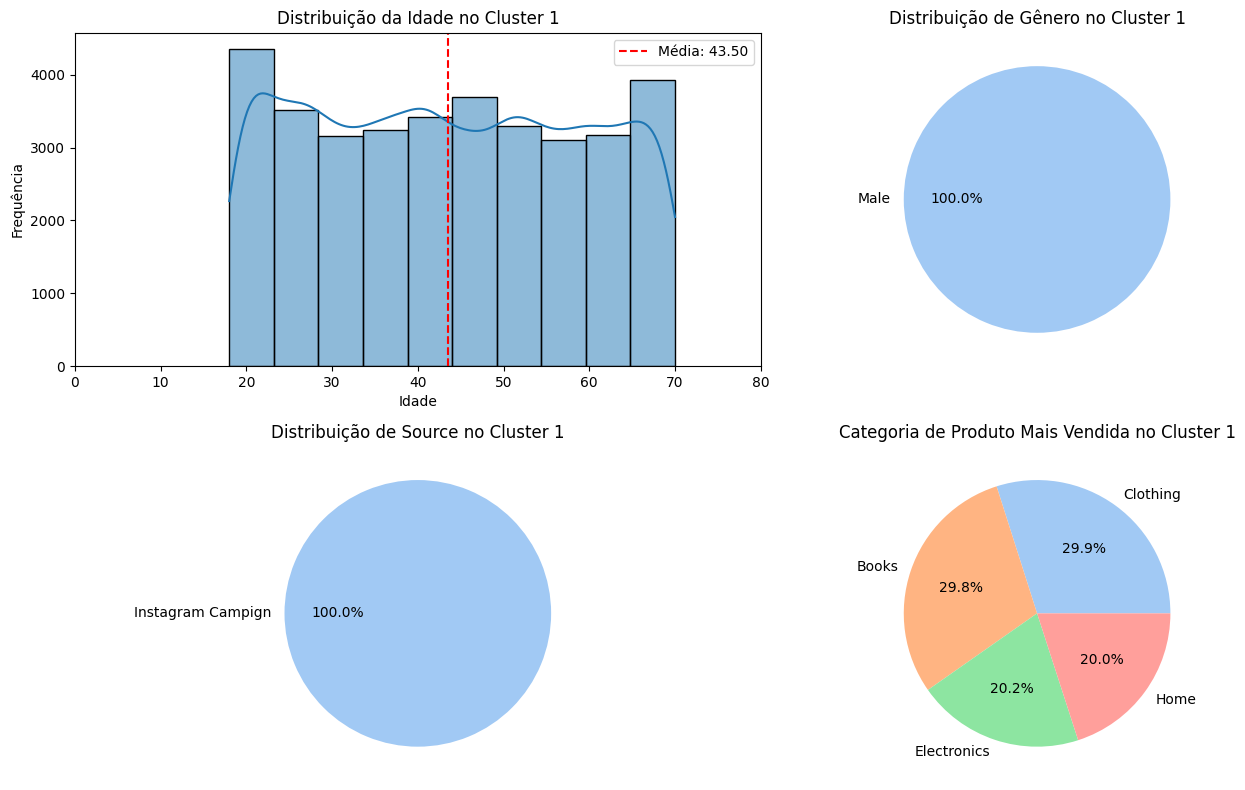

In [39]:
# Analisando o segundo cluster (Cluster 1)

if len(cluster_summary) >= 1:
    cluster_1_data = cluster_summary.get_group(0)

    # Configuração do layout para exibir os gráficos de forma compacta
    fig, axs = plt.subplots(2, 2, figsize=(14, 8))

    # Histograma da idade para o Cluster 1
    sns.histplot(cluster_1_data['Customer Age'], bins=10, kde=True, ax=axs[0, 0])
    axs[0, 0].axvline(cluster_1_data['Customer Age'].mean(), color='r', linestyle='--', label=f'Média: {cluster_1_data["Customer Age"].mean():.2f}')
    axs[0, 0].set_title('Distribuição da Idade no Cluster 1')
    axs[0, 0].set_xlabel('Idade')
    axs[0, 0].set_ylabel('Frequência')
    axs[0, 0].legend()
    axs[0, 0].set_xlim(left=0, right=80)

    # Gráfico de pizza para o gênero no Cluster 1
    gender_distribution = cluster_1_data['Gender'].value_counts()
    axs[0, 1].pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    axs[0, 1].set_title('Distribuição de Gênero no Cluster 1')

    # Gráfico de pizza para o source no Cluster 1
    source_distribution = cluster_1_data['Source'].value_counts()
    axs[1, 0].pie(source_distribution, labels=source_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    axs[1, 0].set_title('Distribuição de Source no Cluster 1')

    # Gráfico de pizza para a categoria de produto mais vendida no Cluster 1
    product_category_distribution = cluster_1_data['Product Category'].value_counts()
    axs[1, 1].pie(product_category_distribution, labels=product_category_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    axs[1, 1].set_title('Categoria de Produto Mais Vendida no Cluster 1')

    # Ajustando o layout
    plt.tight_layout()
    plt.show()
else:
    print("O Cluster 1 não existe")


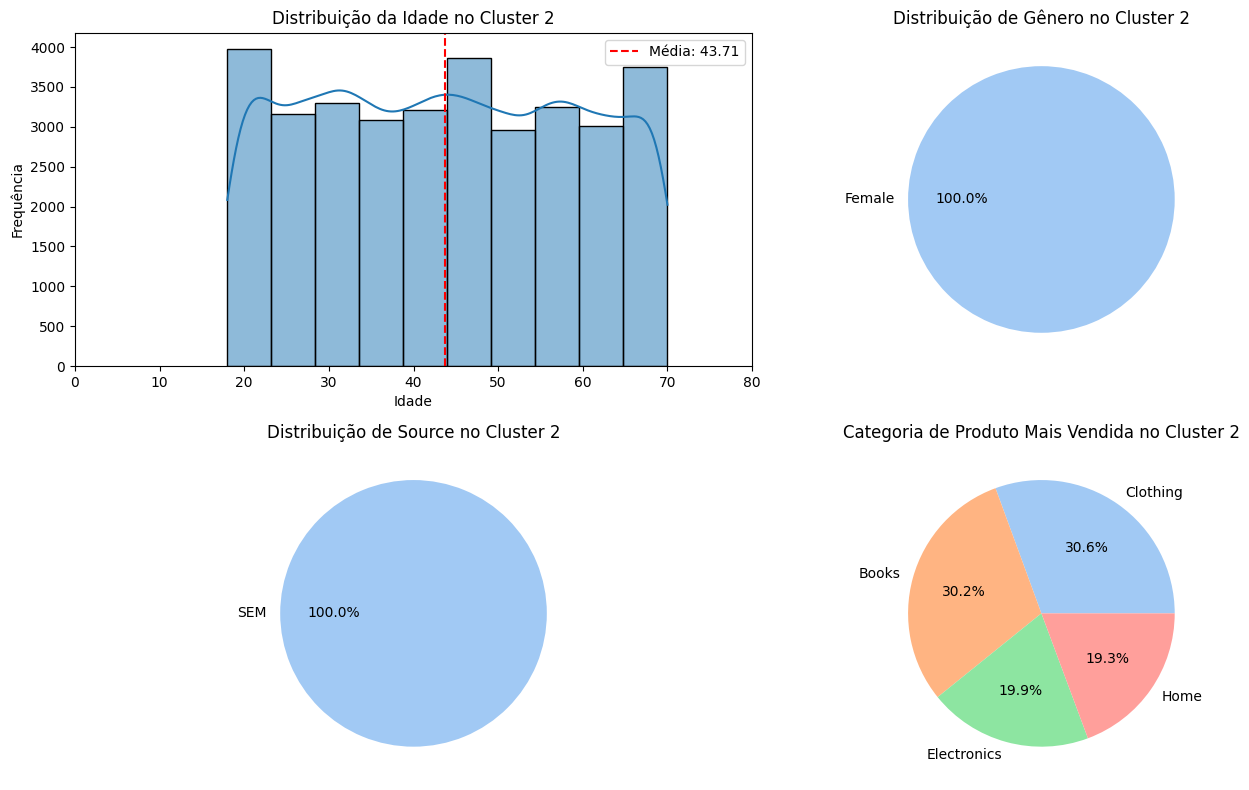

In [40]:
# Analisando o segundo cluster (Cluster 2)
if len(cluster_summary) >= 2:
    cluster_2_data = cluster_summary.get_group(1)

    # Configuração do layout para exibir os gráficos de forma compacta
    fig, axs = plt.subplots(2, 2, figsize=(14, 8))

    # Histograma da idade para o Cluster 2
    sns.histplot(cluster_2_data['Customer Age'], bins=10, kde=True, ax=axs[0, 0])
    axs[0, 0].axvline(cluster_2_data['Customer Age'].mean(), color='r', linestyle='--', label=f'Média: {cluster_2_data["Customer Age"].mean():.2f}')
    axs[0, 0].set_title('Distribuição da Idade no Cluster 2')
    axs[0, 0].set_xlabel('Idade')
    axs[0, 0].set_ylabel('Frequência')
    axs[0, 0].legend()
    axs[0, 0].set_xlim(left=0, right=80)

    # Gráfico de pizza para o sexo no Cluster 2
    gender_distribution = cluster_2_data['Gender'].value_counts()
    axs[0, 1].pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    axs[0, 1].set_title('Distribuição de Gênero no Cluster 2')

    # Gráfico de pizza para o source no Cluster 2
    source_distribution = cluster_2_data['Source'].value_counts()
    axs[1, 0].pie(source_distribution, labels=source_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    axs[1, 0].set_title('Distribuição de Source no Cluster 2')

    # Gráfico de pizza para a categoria de produto mais vendida no Cluster 2
    product_category_distribution = cluster_2_data['Product Category'].value_counts()
    axs[1, 1].pie(product_category_distribution, labels=product_category_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    axs[1, 1].set_title('Categoria de Produto Mais Vendida no Cluster 2')

    # Ajustando o layout
    plt.tight_layout()
    plt.show()
else:
    print("O Cluster 2 não existe")


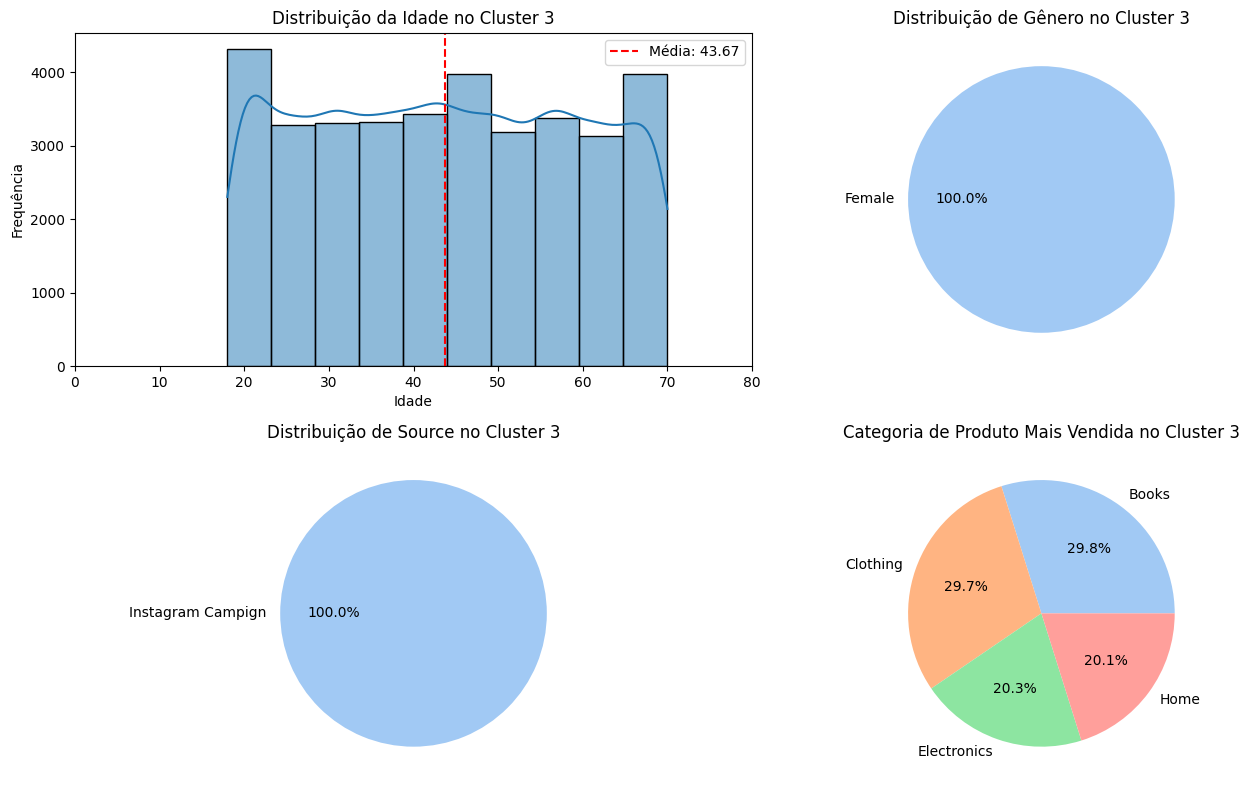

In [41]:
# Analisando o quarto cluster (Cluster 3)
if len(cluster_summary) >= 3:
    cluster_3_data = cluster_summary.get_group(2)

    # Configuração do layout para exibir os gráficos de forma compacta
    fig, axs = plt.subplots(2, 2, figsize=(14, 8))

    # Histograma da idade para o Cluster 3
    sns.histplot(cluster_3_data['Customer Age'], bins=10, kde=True, ax=axs[0, 0])
    axs[0, 0].axvline(cluster_3_data['Customer Age'].mean(), color='r', linestyle='--', label=f'Média: {cluster_3_data["Customer Age"].mean():.2f}')
    axs[0, 0].set_title('Distribuição da Idade no Cluster 3')
    axs[0, 0].set_xlabel('Idade')
    axs[0, 0].set_ylabel('Frequência')
    axs[0, 0].legend()
    axs[0, 0].set_xlim(left=0, right=80)

    # Gráfico de pizza para o sexo no Cluster 3
    gender_distribution = cluster_3_data['Gender'].value_counts()
    axs[0, 1].pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    axs[0, 1].set_title('Distribuição de Gênero no Cluster 3')

    # Gráfico de pizza para o source no Cluster 3
    source_distribution = cluster_3_data['Source'].value_counts()
    axs[1, 0].pie(source_distribution, labels=source_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    axs[1, 0].set_title('Distribuição de Source no Cluster 3')

    # Gráfico de pizza para a categoria de produto mais vendida no Cluster 3
    product_category_distribution = cluster_3_data['Product Category'].value_counts()
    axs[1, 1].pie(product_category_distribution, labels=product_category_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    axs[1, 1].set_title('Categoria de Produto Mais Vendida no Cluster 3')

    # Ajustando o layout
    plt.tight_layout()
    plt.show()
else:
    print("O Cluster 3 não existe")


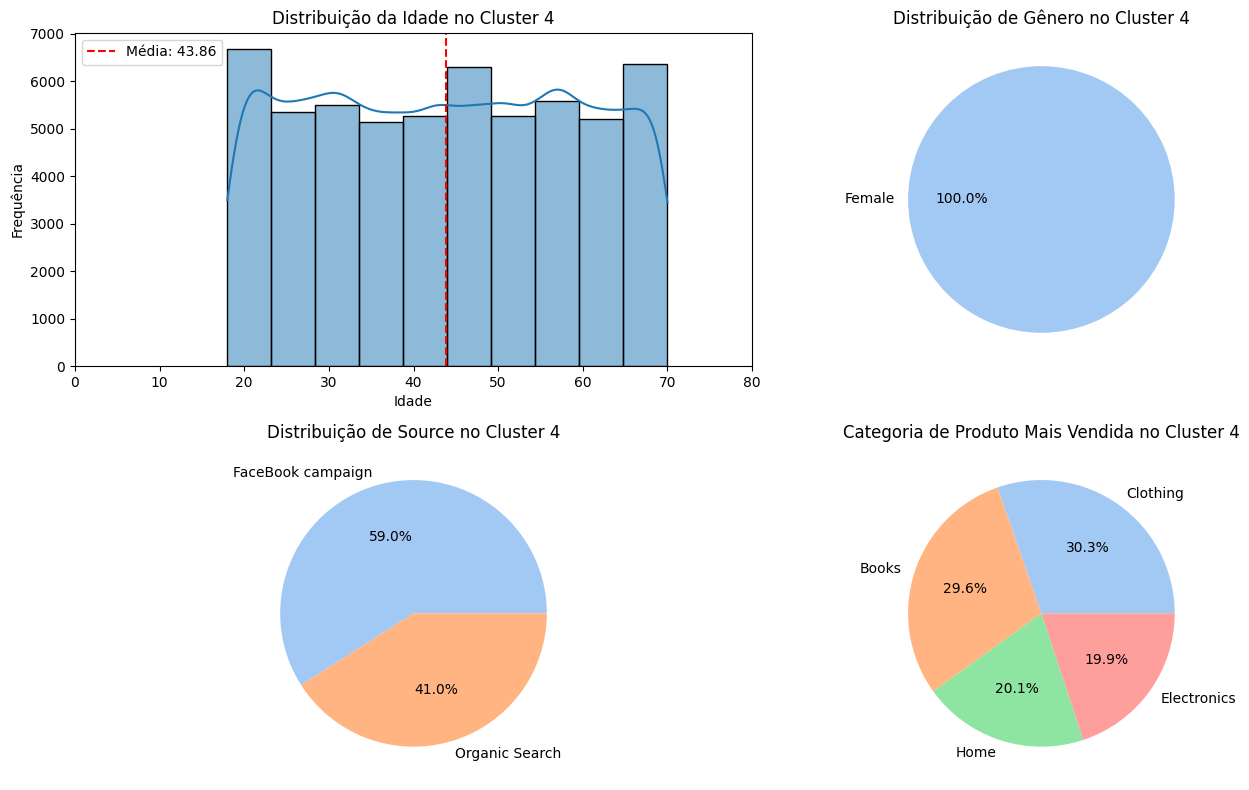

In [42]:
# Analisando o quarto cluster (Cluster 4)
if len(cluster_summary) >= 4:
    cluster_4_data = cluster_summary.get_group(3)

    # Configuração do layout para exibir os gráficos de forma compacta
    fig, axs = plt.subplots(2, 2, figsize=(14, 8))

    # Histograma da idade para o Cluster 4
    sns.histplot(cluster_4_data['Customer Age'], bins=10, kde=True, ax=axs[0, 0])
    axs[0, 0].axvline(cluster_4_data['Customer Age'].mean(), color='r', linestyle='--', label=f'Média: {cluster_4_data["Customer Age"].mean():.2f}')
    axs[0, 0].set_title('Distribuição da Idade no Cluster 4')
    axs[0, 0].set_xlabel('Idade')
    axs[0, 0].set_ylabel('Frequência')
    axs[0, 0].legend()
    axs[0, 0].set_xlim(left=0, right=80)

    # Gráfico de pizza para o sexo no Cluster 4
    gender_distribution = cluster_4_data['Gender'].value_counts()
    axs[0, 1].pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    axs[0, 1].set_title('Distribuição de Gênero no Cluster 4')

    # Gráfico de pizza para o source no Cluster 4
    source_distribution = cluster_4_data['Source'].value_counts()
    axs[1, 0].pie(source_distribution, labels=source_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    axs[1, 0].set_title('Distribuição de Source no Cluster 4')

    # Gráfico de pizza para a categoria de produto mais vendida no Cluster 4
    product_category_distribution = cluster_4_data['Product Category'].value_counts()
    axs[1, 1].pie(product_category_distribution, labels=product_category_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    axs[1, 1].set_title('Categoria de Produto Mais Vendida no Cluster 4')

    # Ajustando o layout
    plt.tight_layout()
    plt.show()
else:
    print("O Cluster 4 não existe")


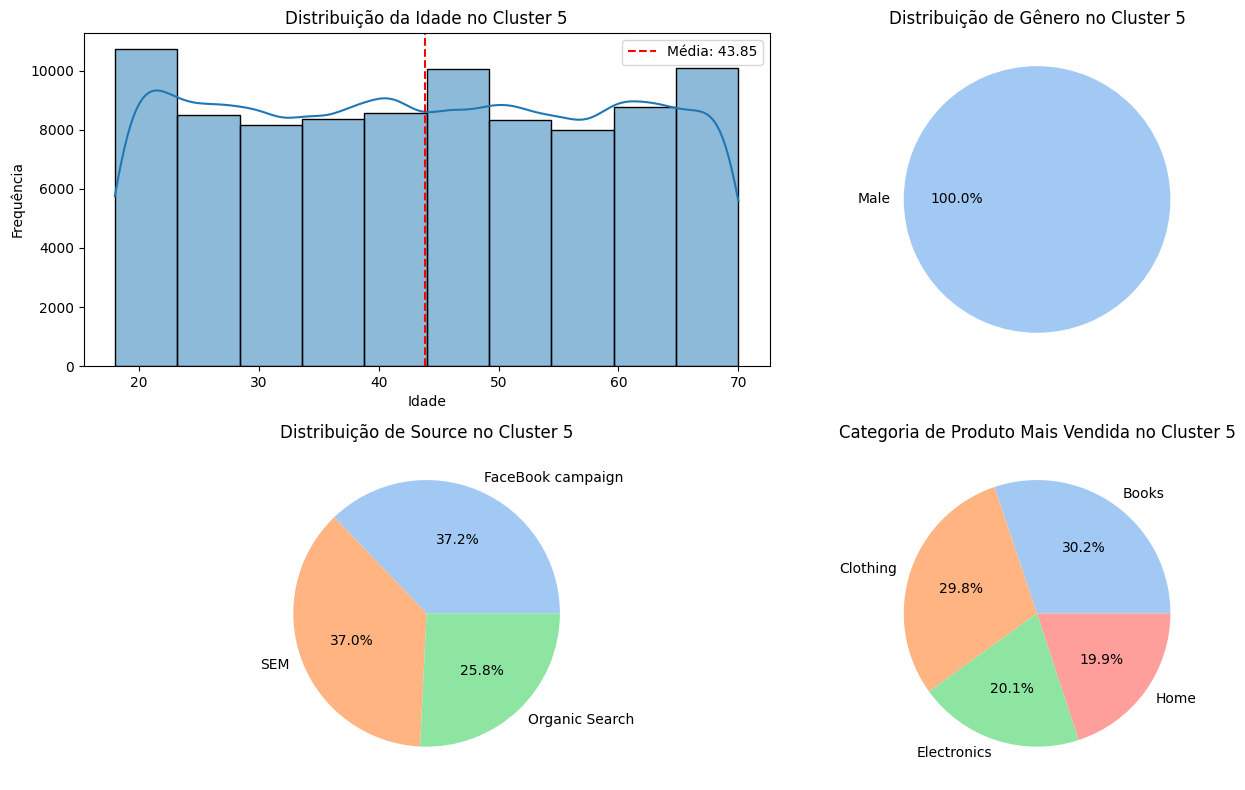

In [43]:
# Analisando o quinto cluster (Cluster 5)
if len(cluster_summary) >= 5:
    cluster_5_data = cluster_summary.get_group(4)

    # Configuração do layout para exibir os gráficos de forma compacta
    fig, axs = plt.subplots(2, 2, figsize=(14, 8))

    # Histograma da idade para o Cluster 5
    sns.histplot(cluster_5_data['Customer Age'], bins=10, kde=True, ax=axs[0, 0])
    axs[0, 0].axvline(cluster_5_data['Customer Age'].mean(), color='r', linestyle='--', label=f'Média: {cluster_5_data["Customer Age"].mean():.2f}')
    axs[0, 0].set_title('Distribuição da Idade no Cluster 5')
    axs[0, 0].set_xlabel('Idade')
    axs[0, 0].set_ylabel('Frequência')
    axs[0, 0].legend()

    # Gráfico de pizza para o sexo no Cluster 5
    gender_distribution = cluster_5_data['Gender'].value_counts()
    axs[0, 1].pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    axs[0, 1].set_title('Distribuição de Gênero no Cluster 5')

    # Gráfico de pizza para o source no Cluster 5
    source_distribution = cluster_5_data['Source'].value_counts()
    axs[1, 0].pie(source_distribution, labels=source_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    axs[1, 0].set_title('Distribuição de Source no Cluster 5')

    # Gráfico de pizza para a categoria de produto mais vendida no Cluster 5
    product_category_distribution = cluster_5_data['Product Category'].value_counts()
    axs[1, 1].pie(product_category_distribution, labels=product_category_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    axs[1, 1].set_title('Categoria de Produto Mais Vendida no Cluster 5')

    # Ajustando o layout
    plt.tight_layout()
    plt.show()
else:
    print("O Cluster 5 não existe")


In [44]:
# Analisando o sexto cluster (Cluster 6)
if len(cluster_summary) >= 6:
    cluster_6_data = cluster_summary.get_group(5)

    # Configuração do layout para exibir os gráficos de forma compacta
    fig, axs = plt.subplots(2, 2, figsize=(14, 8))

    # Histograma da idade para o Cluster 6
    sns.histplot(cluster_6_data['Customer Age'], bins=10, kde=True, ax=axs[0, 0])
    axs[0, 0].axvline(cluster_6_data['Customer Age'].mean(), color='r', linestyle='--', label=f'Média: {cluster_6_data["Customer Age"].mean():.2f}')
    axs[0, 0].set_title('Distribuição da Idade no Cluster 6')
    axs[0, 0].set_xlabel('Idade')
    axs[0, 0].set_ylabel('Frequência')
    axs[0, 0].legend()

    # Gráfico de pizza para o sexo no Cluster 6
    gender_distribution = cluster_6_data['Gender'].value_counts()
    axs[0, 1].pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    axs[0, 1].set_title('Distribuição de Gênero no Cluster 6')

    # Gráfico de pizza para o source no Cluster 6
    source_distribution = cluster_6_data['Source'].value_counts()
    axs[1, 0].pie(source_distribution, labels=source_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    axs[1, 0].set_title('Distribuição de Source no Cluster 6')

    # Gráfico de pizza para a categoria de produto mais vendida no Cluster 6
    product_category_distribution = cluster_6_data['Product Category'].value_counts()
    axs[1, 1].pie(product_category_distribution, labels=product_category_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    axs[1, 1].set_title('Categoria de Produto Mais Vendida no Cluster 6')

    # Ajustando o layout
    plt.tight_layout()
    plt.show()
else:
    print("O Cluster 6 não existe")


O Cluster 6 não existe
